In [97]:
import random
from scipy.integrate import solve_ivp

campvec = []
contador = 0
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(-10, 10)
    b2 = random.randint(-10, 10)
    d1 = random.randint(-10, 10)
    d2 = random.randint(-10, 10)
    n = random.randint(0, 10)

    coef1 = [a1, a2, b1, b2, d1, d2, n]

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    x_range_neg = -10
    x_range_pos = 10
    y_range_neg = -10
    y_range_pos =10

    y1 = np.linspace(x_range_neg, x_range_pos, 50)
    y2 = np.linspace(y_range_neg, y_range_pos, 50)

    Y1, Y2 = np.meshgrid(y1, y2)
    
    t1 = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    u1, v1 = f(t1, [Y1, Y2])
    u, v = f(t1, [Y1, Y2])
    M = (np.hypot(u, v))
    u /= M
    v /= M

    campvecci = np.append([u1], [v1], axis=0)

    campvec = campvecci
    print('--------------------------------------------')
    print(coef1)

    
campvec = np.array(campvec)

--------------------------------------------
[1, 2, 1, -10, 10, -10, 2]


##  Encontramos puntos de equilibro datos reales

In [100]:
from scipy.optimize import fsolve
# Sistema de ecuaciones
def system(Y):
    X, Y = Y
    dX_dt = a1/(1+Y**n)-d1*X+b1
    dY_dt = a2/(1+X**n)-d2*Y+b1
    return [dX_dt, dY_dt]

# Adivinanza inicial para X, Y
initial_guess = [0, 0]

# Encontrar los puntos de equilibrio
primer_cuadrante_reales = fsolve(system, initial_guess)
primer_cuadrante_reales = tuple(primer_cuadrante_reales)


print(primer_cuadrante_reales)

(0.19209968990115361, -0.29288220477755766)


## Graficamos con los coeficientes reales

Text(0, 0.5, 'Concentración Y')

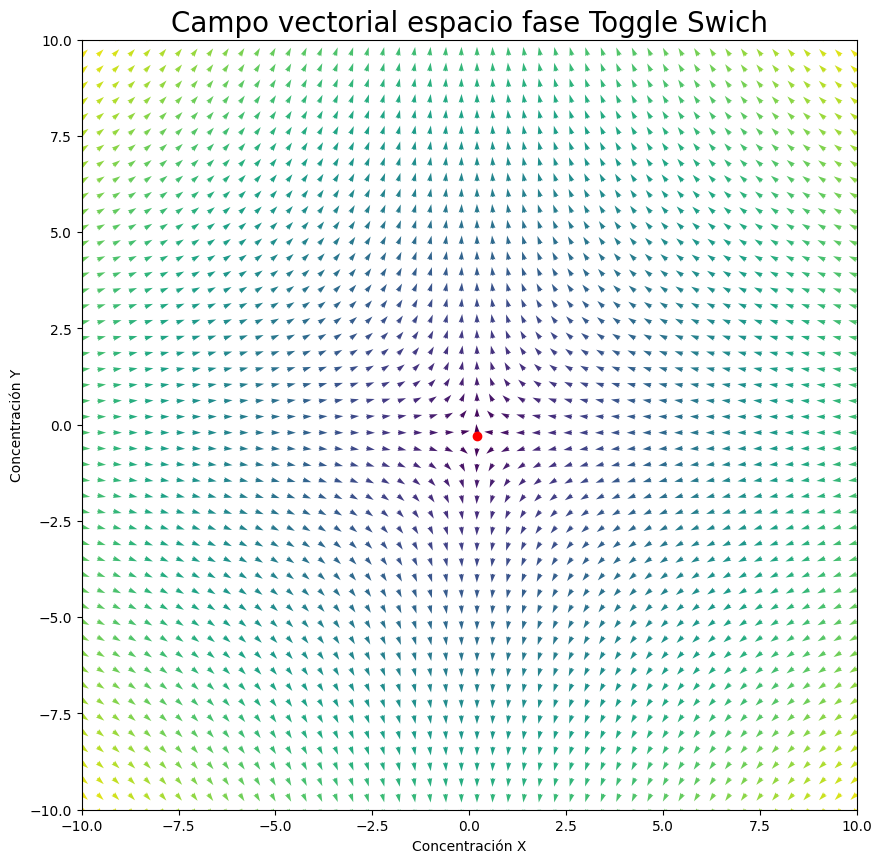

In [101]:
import matplotlib.pyplot as plt

x_values = primer_cuadrante_reales[0]
y_values =primer_cuadrante_reales[1]
Y1, Y2 = np.meshgrid(y1, y2)
t1 = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape        
u,v = np.array(campvec)[0,:,:], np.array(campvec)[1,:,:]
M = (np.hypot(u,v))
u /= M
v /= M

plt.figure(figsize=(10,10))
Q = plt.quiver(Y1, Y2, u, v, M, angles='xy')
plt.title('Campo vectorial espacio fase Toggle Swich', fontsize=20)
plt.xlim([x_range_neg, x_range_pos])
plt.ylim([y_range_neg, y_range_pos])
plt.scatter(x_values, y_values, color='red')  # Puedes cambiar el color como prefieras
plt.xlabel('Concentración X')
plt.ylabel('Concentración Y')

In [102]:
import sympy as sp

X, Y, a1, a2, d1, d2, b1, n = sp.symbols('X Y a1 a2 d1 d2 b1 n')

# Sistema de ecuaciones
dX_dt = a1/(1+Y**n)-d1*X+b1
dY_dt = a2/(1+X**n)-d2*Y+b1

# Resuelve el sistema de ecuaciones
stationary_points = sp.solve([dX_dt, dY_dt], (X, Y))

def estandarizar(resultado):
    # Si el resultado es un diccionario, lo convertimos en una lista con un solo par de coordenadas
    if isinstance(resultado, dict):
        resultado = [(resultado[X], resultado[Y])]
    return resultado

stationary_points = estandarizar(stationary_points)  # Imprime los puntos estacionarios
print(stationary_points)

NotImplementedError: could not solve a2 + (-Y*d2 + b1)*(((Y**n*b1 + a1 + b1)/(d1*(Y**n + 1)))**n + 1)